In [0]:
import tensorflow as tf
import numpy as np
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [0]:
# Read and process the dataset

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [0]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))


In [0]:
def support_vector_machine(training_data, training_label, test_data, test_label):

    print('Performing SVM')

    # Classify as SVM
    classifier = svm.SVC(C=1.0, kernel='linear', gamma='scale')

    # Perform Training
    classifier.fit(training_data, training_label)

    # Predict
    yhat = classifier.predict(test_data)

    accuracy = metrics.accuracy_score(test_label, yhat)
    confusion = confusion_matrix(test_label, yhat)
    disp = metrics.plot_confusion_matrix(classifier, test_data, test_label)
    print("Confusion matrix:\n%s" % disp.confusion_matrix)

    return accuracy, confusion

Loading MNIST data
Performing SVM
Confusion matrix:
[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]
Accuracy: 94.04%


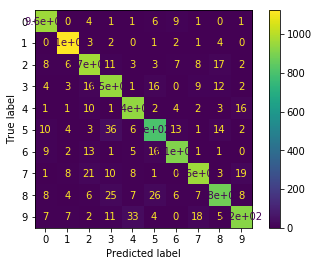

In [0]:

# Read and process the dataset
print('Loading MNIST data')
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

IMAGE_SIZE = x_train.shape[-1]

x_train = x_train.reshape((-1, IMAGE_SIZE*IMAGE_SIZE))
x_test = x_test.reshape((-1, IMAGE_SIZE*IMAGE_SIZE))

accuracy, confusion = support_vector_machine(x_train, y_train, x_test, y_test)
print('Accuracy: ' + str(accuracy*100) + '%')

##Part-2

###**Identify the Lagrange dual problem of the following primal problem**

We need to minimize 
\begin{equation*}
w^T.w + C \sum_{i=1}^N \xi_i
\end{equation*}
which is subjected to
\begin{equation*}
y_i. (w^T.x_i) \geq 1 - \xi_i \  and \  \xi_i \geq 0 \ for \ i = 1 , ... , N
\end{equation*}
The margin can be written as 
\begin{equation*}
\gamma = \frac {1}{\sqrt{w^T.w + C \sum_{i=1}^N \xi_i}}
\end{equation*}
We know Lagrange function can be written as:
\begin{equation*}
L = \frac{1}{2}\vec{w}^T.\vec{w} +  C \sum_{i=1}^N \xi_i + \sum_i \alpha_i(1-y_i.w^t.x_i-\xi_i)-\sum_{i=1}^N \beta_i \xi_i
\end{equation*}


*   Lagrange Multipliers $\alpha$ and $\beta$ as constraints to be $\geq 0 $
*   Inequaltiy constraints $(1-y_i.w^t.x_i-\xi_i) \leq 0$ and $\xi_i \geq 0 \ for \ i = 1 , ... , N$

**Claim**:
$\max_{\alpha,\beta}\min_{w,\xi}(L) \leq \min_{w,\xi} \max_{\alpha,\beta}(L)$

\begin{equation*}
L = \frac{1}{2}\vec{w}^T.\vec{w} +  C \sum_{i=1}^N \xi_i + \sum_i \alpha_i(1-y_i.w^t.x_i-\xi_i)-\sum_{i=1}^N \beta_i \xi_i \tag{1}
\end{equation*}
Set the partial derivative of Lagrange function over $primal$ variables to $0$
\begin{equation*}
\frac {\partial{L}}{\partial w} = w - \sum_i \alpha_i y_i \vec{x_i} = 0
\end{equation*}
\begin{equation*}
w = \sum_i\alpha_i y_i \vec{x_i} \tag{2}
\end{equation*}
\begin{equation*}
\frac {\partial{L}}{\partial \xi} = 0
\end{equation*}
\begin{equation*}
C - \alpha_i - \beta_i = 0 \Rightarrow C = \alpha_i + \beta_i \tag{3}
\end{equation*}

Sustituting obtained $w$ from $(2)$ and $(3)$ in $(1)$, we get
\begin{equation*}
L = \frac{1}{2}w^T \sum_i \alpha_i y_i \vec{x_i} + 
(\alpha_i + \beta_i) \sum_{i=1}^N \xi_i + 
\sum_i \alpha_i (1-y_iw_T\vec{x_i}-\xi_i)-\sum_{i=1}^N \beta_i \xi_i \\
=\frac{1}{2}w^T \sum_i \alpha_i y_i \vec{x_i} + 
\alpha_i\sum_{i=1}^N \xi_i + \beta_i \sum_{i=1}^N \xi_i +
\sum_i \alpha_i-w_T\sum_i \alpha_i y_i  \vec{x_i}-\sum_i \alpha_i\xi_i-\sum_{i=1}^N \beta_i \xi_i
\end{equation*}
\begin{equation*}
L = \sum_i \alpha_i - \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j \vec{x_i}^T x_j
\end{equation*}




**Point out what is the "margin" in both the primal formulation and the dual formulation**\
The **Primal** margin is:
\begin{equation*}
\gamma = \frac {1}{\sqrt{w^T.w + C \sum_{i=1}^N \xi_i}}
\end{equation*}
and\
The **Dual** margin is:
\begin{equation*}
\gamma = \frac {1}{\sqrt{\alpha_i \alpha_j y_i y_j \vec{x_i}^T x_j}}
\end{equation*}



**What are the benefits of maximizing the margin?**\
In SVM, the points near the descision boundary signifies very uncertain classification decisions. Thus maximizing the margins seems good because uncertainity can decide the classifier either to the positive side of the plane or to the negative side. \
So having classifier with a Large margin makes low classification decisions which gives us a margin where slight variation will not cause a misclassification.\
Having Higher margin also helps us avoid overfitting by generalizing the model.


**Characterize the support vectors**

For Vectors lying on the decision boundaries
*   $\pi - plane : W^TX + b \leq -1$ for class $y$ in $-ve$ class
*   $\pi + plane : W^TX + b \leq 1$ for class $y$ in $+ve$ class $(\xi n=0)$

For Vectors lying within the decision boundaries 
*   $0 \leq \xi n < 1$

For Vectors lying outside decision boundaries outside the hyperplane
*   $\xi n \geq 1$




**Point out the benefit of solving the dual problem instead of the primal problem**
*   It is easier to optimize the in dual rather than the primal as the number of data points is lower than the number of dimensions
*   Regularizing the "sparse support vector" associated with the dual hypothesis is sometimes more intuitive than regularizing the vector of regression coefficients
*   One of the important advantage of using the dual form in SVM is that it allow us to apply kernels. Kernel search an optimal separating hyperplane in a higher dimensional space without increasing the computational complexity much

